<a href="https://colab.research.google.com/github/MrJellimann/machine_learning_homework/blob/master/HW2_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Christopher Walen, COP 4630, Fall 2019**

Problem 2

Modify the network architecture in the notebook for classifying MNIST fashion items with dense layers and analyzing model performance by varying the number of hidden layers and choosing different sizes for the hidden layers.
(https://colab.research.google.com/drive/1TTO7P5GTmsHhIt_YGqZYyw4KGBCnjqyW)

Give three models consisting of only dense layers that

first model underfits (the model is too simple and cannot explain the data)
second model overfits (the model is unnecessarily complex so it can easily adapt too much to the training data)
third is pretty good (the model is either too simple, nor too complex; you don't train for too many epochs; you use dropout to fight overfitting)
Make sure that you plot the curves depicting the training/validation accuracy/loss.

## **Old Version - Half-working**

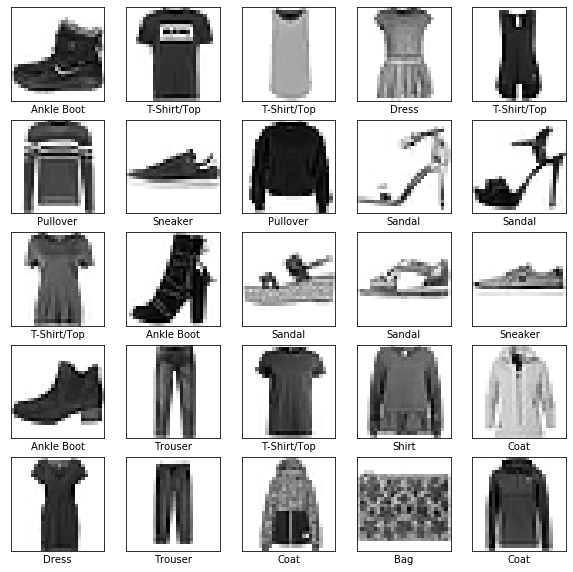

Performing Underfit...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0647 - acc: 0.9760 - val_loss: 0.6941 - val_acc: 0.8828
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0602 - acc: 0.9780 - val_loss: 0.6956 - val_acc: 0.8827
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0635 - acc: 0.9765 - val_loss: 0.7191 - val_acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0632 - acc: 0.9757 - val_loss: 0.7223 - val_acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0629 - acc: 0.9763 - val_loss: 0.7065 - val_acc: 0.8835
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0595 - acc: 0.9779 - val_loss: 0.7166 - val_acc: 0.8832
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0571 - acc

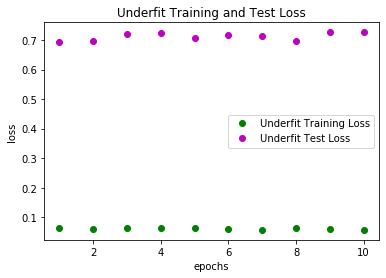

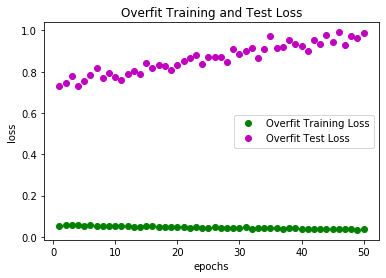

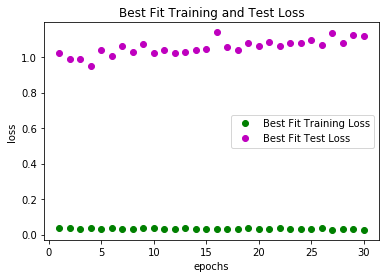

In [9]:
# Loading MNIST fashion data
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Set the class names for the labels
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Display MNIST fashion items
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Data Preprocessing -> Normalize
train_images = train_images / 255
test_images = test_images / 255

# Epochs model
# Layers
model_under = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_over = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation=tf.nn.relu),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dense(100, activation=tf.nn.softmax)
])
model_avg = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(20, activation=tf.nn.softmax)
])
# Compilation
model_under.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_over.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_avg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
print("Performing Underfit...")
history_under = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
print("Performing Overfit...")
history_over = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))
print("Performing 'average' fit...")
history_avg = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

# Plot underfit
history_dict_under = history_under.history
loss_under = history_dict_under['loss']
test_loss_under = history_dict_under['val_loss']
epochs_range_under = range(1, 11)

plt.plot(epochs_range_under, loss_under, 'go', label='Underfit Training Loss')
plt.plot(epochs_range_under, test_loss_under, 'mo', label='Underfit Test Loss')
plt.title('Underfit Training and Test Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Plot overfit
history_dict_over = history_over.history
loss_over = history_dict_over['loss']
test_loss_over = history_dict_over['val_loss']
epochs_range_over = range(1, 51)

plt.plot(epochs_range_over, loss_over, 'go', label='Overfit Training Loss')
plt.plot(epochs_range_over, test_loss_over, 'mo', label='Overfit Test Loss')
plt.title('Overfit Training and Test Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Plot 'average' fit
history_dict_avg = history_avg.history
loss_avg = history_dict_avg['loss']
test_loss_avg = history_dict_avg['val_loss']
epochs_range_avg = range(1, 31)

plt.plot(epochs_range_avg, loss_avg, 'go', label='Best Fit Training Loss')
plt.plot(epochs_range_avg, test_loss_avg, 'mo', label='Best Fit Test Loss')
plt.title('Best Fit Training and Test Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


## **New Version - Underfit**


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 18us/step - loss: 2.0568 - acc: 0.2010 - val_loss: 1.9386 - val_acc: 0.1978
Epoch 2/30
60000/60000 [==============================] - 1s 14us/step - loss: 1.8834 - acc: 0.2121 - val_loss: 1.8410 - val_acc: 0.2084
Epoch 3/30
60000/60000 [==============================] - 1s 14us/step - loss: 1.8076 - acc: 0.2301 - val_loss: 1.7895 - val_acc: 0.2247
Epoch 4/30
60000/60000 [==============================] -

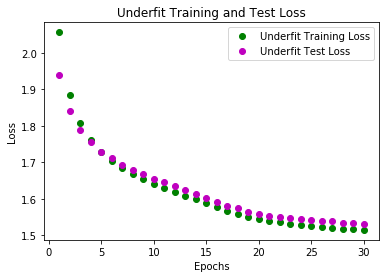

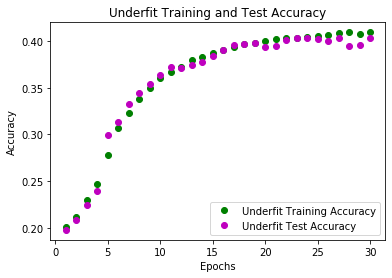

In [11]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,))) # default was 512
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 30 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'go', label='Underfit Training Loss')
plt.plot(epochs_range, test_loss_values, 'mo', label='Underfit Test Loss')
plt.title('Underfit Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Underfit Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'mo', label='Underfit Test Accuracy')
plt.title('Underfit Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **New Version - Overfit**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 270,218
Trainable params: 270,218
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3540 - acc: 0.8910 - val_loss: 0.1786 - val_acc: 0.9438
Epoch 2/50
60000/60000 [==============================] - 3

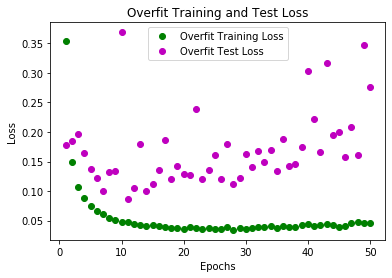

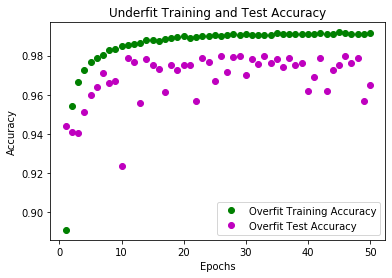

In [15]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,))) # default was 512
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 50 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=256, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'go', label='Overfit Training Loss')
plt.plot(epochs_range, test_loss_values, 'mo', label='Overfit Test Loss')
plt.title('Overfit Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Overfit Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'mo', label='Overfit Test Accuracy')
plt.title('Underfit Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **New Version - Best Fit**

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 47us/step - loss: 0.4369 - acc: 0.8719 - val_loss: 0.2045 - val_acc: 0.9384
Epoch 2/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.2167 - acc: 0.9372 - val_loss: 0.1446 - val_acc: 0.9578
Epoch 3/40
60000/60000 [==============================

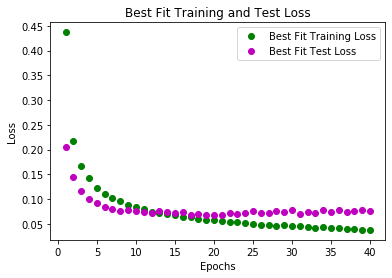

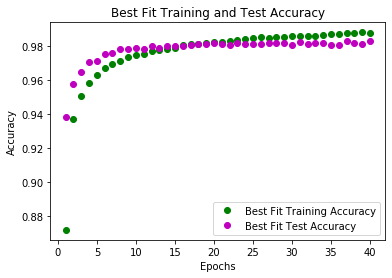

In [17]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,))) # default was 512
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 40 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=256, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'go', label='Best Fit Training Loss')
plt.plot(epochs_range, test_loss_values, 'mo', label='Best Fit Test Loss')
plt.title('Best Fit Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Best Fit Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'mo', label='Best Fit Test Accuracy')
plt.title('Best Fit Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()